<p style="font-size:12px;">
<h3><b>First Metrtic</b></h3>
My metric was based on the number of dogs per square mile. I did some estimating in places so this is not exact information. For example my data set was organized by all the zip codes in Allegheny county, so I had to sort the neighborhoods into zip codes, which they don't cleanly fit into, then based the amount of dogs in each by the percent of square miles the neighborhood took up.

Imports pandas so we can use it's functions.

In [10]:
import pandas as pd

This block reads the csv file with the information for dogs, and the csv file I created with the neighborhoods and their zipcodes and size in sq. miles. It creates a dictionary of the zipcodes of all the dogs and a dictionary of the areas of each zipcode. 

In [13]:
dogLis = pd.read_csv("dog.csv")
NH = pd.read_csv("neighborhoods.csv")
zipDogs = dogLis['OwnerZip'].value_counts()
zipArea = NH.groupby("Zip")["area"].sum()

This cell creates a list for the number of dogs in each neighborhood and the dogs per sq. mile in each neighborhood. It then creates a new column in the neighborhoods data set for each.

In [16]:
numDogs = []
dogPer = []
for row in NH.iterrows():
    prop = row[1]["area"]/zipArea[row[1]["Zip"]]
    dogs = prop * zipDogs[row[1]["Zip"]]
    numDogs.append(round(dogs))
    dogPer.append(round(dogs / row[1]["area"], 3))
NH["numDogs"] = numDogs
NH["dogDensity"] = dogPer

This cell creates the bar graph.

<Axes: title={'center': 'Top neighborhoods by dogs per sq. mile'}, ylabel='Neighborhoods'>

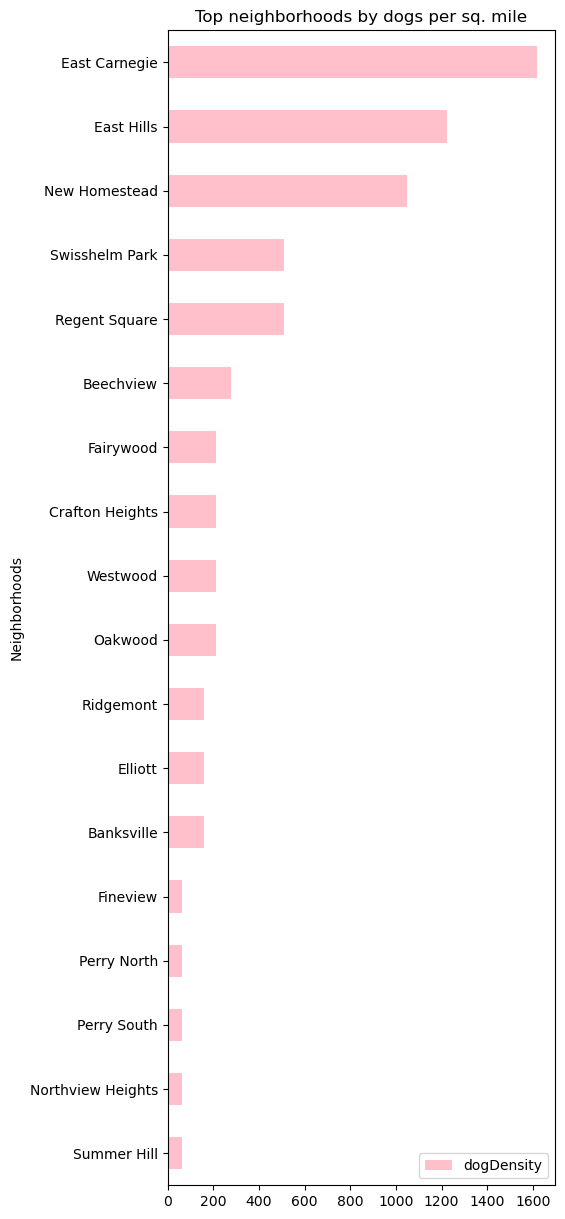

In [30]:
NHS = NH.sort_values(by='dogDensity')
NHSF = NHS[NHS['dogDensity']>50]
NHSF.plot("Neighborhoods", "dogDensity", kind = "barh", figsize = (5,15), title = "Top neighborhoods by dogs per sq. mile", color = "pink")

This cell prints out all neighborhoods from highest dog density to lowest.

In [ ]:
pd.set_option('display.max_rows', 100)
NHSN = NH.sort_values(by='dogDensity', ascending = False)
display(NHSN)

<p style="font-size:12px;">
<h3><b>Conclusion</b></h3>
In conclusion, if you estimate the general amount of dogs per square mile, East Carnegie comes out on top with a density of about 1600 dogs per square mile. Second place goes to East hills with about 1200, and third to New Homestead with about 1000. These numbers are not the exact amount of dogs, but rather the average number of dogs in each square mile, which gives us an idea of how many hoseholds in each neighborhood has a dog in comparasin to eachother. My pick for best neighborhood therefore goes to East Carnegie.